In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print("X_train: {}, y_train: {}".format(X_train.shape, y_train.shape))
print("X_test: {}, y_test: {}".format(X_test.shape, y_test.shape))

X_train: (60000, 28, 28), y_train: (60000,)
X_test: (10000, 28, 28), y_test: (10000,)


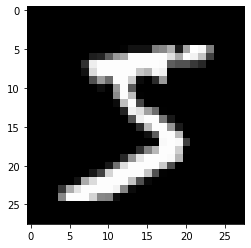

In [3]:
plt.imshow(X_train[0], cmap="gray")
plt.show()

In [4]:
X_train = X_train.reshape(X_train.shape[0], -1)/ 255
X_test = X_test.reshape(X_test.shape[0], -1)/ 255

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

num_classes = y_test.shape[1]

print("X_train: {}, y_train: {}".format(X_train.shape, y_train.shape))
print("X_test: {}, y_test: {}".format(X_test.shape, y_test.shape))

X_train: (60000, 784), y_train: (60000, 10)
X_test: (10000, 784), y_test: (10000, 10)


In [5]:
def create_model(dropout_rate=0.0):
    if(dropout_rate > 0.0):
        model = keras.Sequential([
            Dense(512),
            Dropout(rate=dropout_rate),
            Dense(256),
            Dropout(rate=dropout_rate),
            Dense(128),
            Dropout(rate=dropout_rate),
            Dense(num_classes, activation="softmax")
        ])
    else:
        model = keras.Sequential([
            Dense(512),
            Dense(256),
            Dense(128),
            Dense(num_classes, activation="softmax")
        ])
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [6]:
model_dropout = create_model(dropout_rate=0.5)
hist_dropout = model_dropout.fit(X_train, y_train, 
                                 validation_data=(X_test, y_test), 
                                 epochs=20, batch_size=256)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 84us/sample - loss: 1.4019 - accuracy: 0.5514 - val_loss: 0.4897 - val_accuracy: 0.8628
Epoch 2/20
60000/60000 [==============================] - 5s 80us/sample - loss: 0.7957 - accuracy: 0.7456 - val_loss: 0.4014 - val_accuracy: 0.8846
Epoch 3/20
60000/60000 [==============================] - 5s 85us/sample - loss: 0.6849 - accuracy: 0.7867 - val_loss: 0.3704 - val_accuracy: 0.8923
Epoch 4/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.6304 - accuracy: 0.8060 - val_loss: 0.3518 - val_accuracy: 0.8979
Epoch 5/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.5924 - accuracy: 0.8205 - val_loss: 0.3394 - val_accuracy: 0.9020
Epoch 6/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.5624 - accuracy: 0.8299 - val_loss: 0.3325 - val_accuracy: 0.9058
Epoch 7/20
60000/60000 [==============================] 

In [7]:
model = create_model()
hist = model.fit(X_train, y_train,
                 validation_data=(X_test, y_test), 
                 epochs=20, batch_size=256)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.8059 - accuracy: 0.7888 - val_loss: 0.4601 - val_accuracy: 0.8772
Epoch 2/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4320 - accuracy: 0.8806 - val_loss: 0.3746 - val_accuracy: 0.8955
Epoch 3/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3770 - accuracy: 0.8943 - val_loss: 0.3446 - val_accuracy: 0.9035
Epoch 4/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3511 - accuracy: 0.9009 - val_loss: 0.3279 - val_accuracy: 0.9067
Epoch 5/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3355 - accuracy: 0.9052 - val_loss: 0.3167 - val_accuracy: 0.9085
Epoch 6/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3246 - accuracy: 0.9085 - val_loss: 0.3075 - val_accuracy: 0.9120
Epoch 7/20
60000/60000 [==============================] 

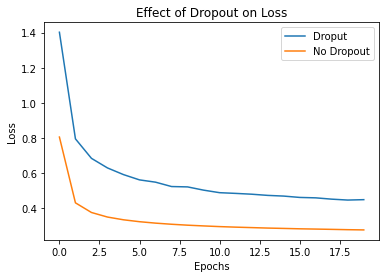

In [8]:
plt.plot(hist_dropout.history['loss'], label="Droput")
plt.plot(hist.history['loss'], label="No Dropout")
plt.title("Effect of Dropout on Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(loc="best")
plt.show()

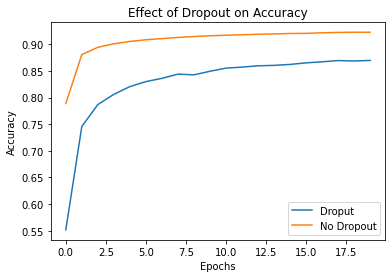

In [9]:
plt.plot(hist_dropout.history['accuracy'], label="Droput")
plt.plot(hist.history['accuracy'], label="No Dropout")
plt.title("Effect of Dropout on Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(loc="best")
plt.show()